In [1]:
import pandas as pd
df = pd.read_csv("cleaned_sales_data_v5.csv")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346581 entries, 0 to 346580
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         346581 non-null  object 
 1   price          346581 non-null  int64  
 2   year           346581 non-null  float64
 3   manufacturer   346581 non-null  object 
 4   model          346581 non-null  object 
 5   condition      346581 non-null  object 
 6   cylinders      346581 non-null  object 
 7   fuel           346581 non-null  object 
 8   odometer       346581 non-null  float64
 9   title_status   346581 non-null  object 
 10  transmission   346581 non-null  object 
 11  drive          346581 non-null  object 
 12  size           346581 non-null  object 
 13  type           346581 non-null  object 
 14  paint_color    346581 non-null  object 
 15  state          346581 non-null  object 
 16  lat            346581 non-null  float64
 17  long           346581 non-nul

In [4]:
df['cluster'].value_counts()

cluster
6     144230
0     124382
9      77426
10       414
5         97
11        26
4          3
1          2
12         1
Name: count, dtype: int64

In [54]:
df.isnull().sum()

region           0
price            0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
title_status     0
transmission     0
drive            0
size             0
type             0
paint_color      0
state            0
lat              0
long             0
posting_date     0
matched_make     0
matched_model    0
cluster          0
dtype: int64

In [6]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,state,lat,long,posting_date,matched_make,matched_model,cluster
0,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,full-size,pickup,red,al,32.5900,-85.480000,2021-05-04T10:41:31-0500,toyota,tundra 4wd,0
1,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,full-size,truck,black,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,ford,f-150 lightning platinum 4wd,6
2,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,full-size,pickup,black,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,gmc,sierra k15 awd,6
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,...,compact,truck,grey,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,toyota,tacoma 4wd,0
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,...,mid-size,pickup,red,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,chevrolet,colorado 4wd,0


### จัดการ outlier

In [3]:
df=df[(df['price']<55000)&(df['price']>0)&(df['odometer']<280000)&(df['lat']>0)&(df['lat']<55)&(df['long']>-157)&(df['long']<-35)]

In [4]:
df = df.dropna()

In [5]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,state,lat,long,posting_date,matched_make,matched_model,cluster
0,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,full-size,pickup,red,al,32.590000,-85.480000,2021-05-04T10:41:31-0500,toyota,tundra 4wd,0
1,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,full-size,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,ford,f-150 lightning platinum 4wd,6
2,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,full-size,pickup,black,al,32.590000,-85.480000,2021-05-03T13:41:25-0500,gmc,sierra k15 awd,6
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,...,compact,truck,grey,al,32.601300,-85.443974,2021-05-03T12:12:59-0500,toyota,tacoma 4wd,0
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,...,mid-size,pickup,red,al,32.590000,-85.480000,2021-05-03T11:31:14-0500,chevrolet,colorado 4wd,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,...,full-size,sedan,white,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,nissan,maxima,0
346577,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,12029.0,clean,...,mid-size,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,volvo,s60,0
346578,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,4174.0,clean,...,mid-size,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,cadillac,xt4 fwd,0
346579,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,...,mid-size,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,lexus,es 350,0


## แบ่งข้อมูลตัวเลข

In [6]:
df_num = df.select_dtypes('number')
df_num = df_num.drop(columns='cluster')
df_num

,price,year,odometer,lat,long
0,30990,2017.0,41124.0,32.590000,-85.480000
1,15000,2013.0,128000.0,32.592000,-85.518900
2,27990,2012.0,68696.0,32.590000,-85.480000
3,35000,2019.0,43000.0,32.601300,-85.443974
4,29990,2016.0,17302.0,32.590000,-85.480000
...,...,...,...,...,...
346576,23590,2019.0,32226.0,33.786500,-84.445400
346577,30590,2020.0,12029.0,33.786500,-84.445400
346578,34990,2020.0,4174.0,33.779214,-84.411811
346579,28990,2018.0,30112.0,33.786500,-84.445400


In [7]:
for i in df_num.columns:
    print(f"coluumn {i}")
    Q1 = df_num[i].quantile(0.25)
    Q3 = df_num[i].quantile(0.75)
    IQR = Q3 - Q1

    # คำนวณขอบเขต
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # ตรวจสอบค่าที่ไม่ใช่ outlier
    filtered_data = df_num[(df_num[i] >= lower_bound) & (df_num[i] <= upper_bound)]
    print(lower_bound,upper_bound)
    print("Q1:", Q1, " Q3:", Q3, " IQR:", IQR, "\n")

coluumn price
-20050.0 51870.0
Q1: 6920.0  Q3: 24900.0  IQR: 17980.0 

coluumn year
1994.5 2030.5
Q1: 2008.0  Q3: 2017.0  IQR: 9.0 

coluumn odometer
-93095.875 275827.125
Q1: 45250.25  Q3: 137481.0  IQR: 92230.75 

coluumn lat
23.934775 53.521375000000006
Q1: 35.02975  Q3: 42.4264  IQR: 7.396650000000001 

coluumn long
-150.10265900000002 -39.26623499999999
Q1: -108.539  Q3: -80.829894  IQR: 27.709106000000006 



In [139]:
df_num['price'].describe()


count    307132.000000
mean      16650.028463
std       12164.384721
min           1.000000
25%        6920.000000
50%       13900.000000
75%       24900.000000
max       54999.000000
Name: price, dtype: float64

In [62]:
df_num['lat'].describe()

count    319042.000000
mean         38.623803
std           5.843259
min           0.438421
25%          34.951225
50%          39.300000
75%          42.477800
max          82.252826
Name: lat, dtype: float64

### take log กันข้อมูลเบ้

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

df_num['price'], _ = boxcox(df_num['price'] + 1e-5)  # ป้องกันศูนย์

##df_num['price'] = np.log1p(df_num['price'])
df_num['odometer'], _ = boxcox(df_num['odometer'] + 1e-5)



In [9]:
df_num['lat'], _ = boxcox(df_num['lat'] + 1e-5)
df_num['year'], _ = boxcox(df_num['year'] + 1e-5)

c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


(array([1374.,   74.,   56.,   27.,   59., 1075.,  309.,  512.,  967.,
         981.,  783.,  935., 1302.,  503.,  595.,  484.,  447., 1189.,
         537.,  401., 1300.,  579.,  867., 1866.,  941., 2668., 1111.,
        4378., 1054., 4043., 1338., 6347., 1769., 4531., 5802., 3505.,
        4492., 8981., 1271., 5057., 8902., 4607., 3501., 6875., 4321.,
        7920., 3498., 8105., 2764., 6834., 2451., 6639., 3065., 6283.,
        4052., 6341., 7471., 2482., 6031., 8088., 2315., 5635., 6788.,
        1988., 6163., 4346., 2352., 4867., 4094., 5021., 6046., 1276.,
        4901., 4476., 4639., 4191., 5777., 3324., 3514., 1997., 3564.,
        3386., 3886., 3059., 2682., 2998., 3205., 3092., 1910., 1328.,
        1325., 1412.,  934., 1054.,  710., 1666.,  289.,  542.,  680.,
         960.]),
 array([9.99997154e-06, 2.53341842e+00, 5.06682684e+00, 7.60023526e+00,
        1.01336437e+01, 1.26670521e+01, 1.52004605e+01, 1.77338689e+01,
        2.02672774e+01, 2.28006858e+01, 2.53340942e+01, 2.

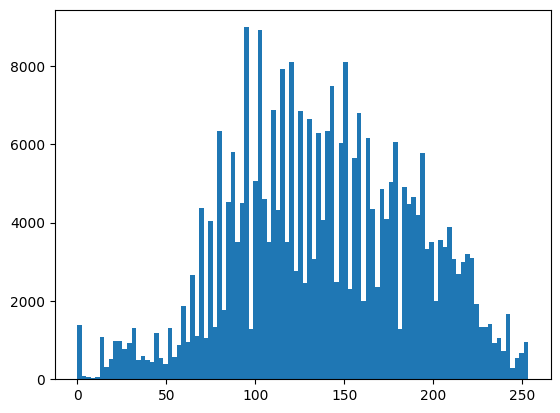

In [10]:
plt.hist(df_num['price'],bins=100)

(array([2945., 1400.,  292.,  348.,  657.,  670.,  596.,  531.,  611.,
         746.,  836., 1008., 1041., 1397., 1292., 1617., 1649., 1875.,
        1714., 2401., 2212., 2422., 2609., 3010., 2828., 3233., 2868.,
        3422., 3531., 3784., 3295., 3614., 3390., 3213., 4088., 3673.,
        3559., 3190., 3477., 3400., 3298., 3437., 3430., 4172., 3743.,
        3733., 4761., 4772., 4343., 4745., 5171., 5128., 4816., 5476.,
        5579., 5693., 7917., 7368., 5571., 5861., 5718., 5225., 6510.,
        5489., 5828., 5856., 5541., 5145., 5312., 5335., 6008., 4396.,
        4336., 4787., 4002., 4181., 3117., 3380., 3592., 2654., 2952.,
        2001., 1975., 3186., 1595., 1568., 1311., 1412., 1027., 1069.,
         798.,  890.,  595.,  811.,  417.,  507.,  296.,  305.,  331.,
         216.]),
 array([-1.80870961e+00,  1.65774084e+01,  3.49635265e+01,  5.33496445e+01,
         7.17357626e+01,  9.01218806e+01,  1.08507999e+02,  1.26894117e+02,
         1.45280235e+02,  1.63666353e+02,  1.82052

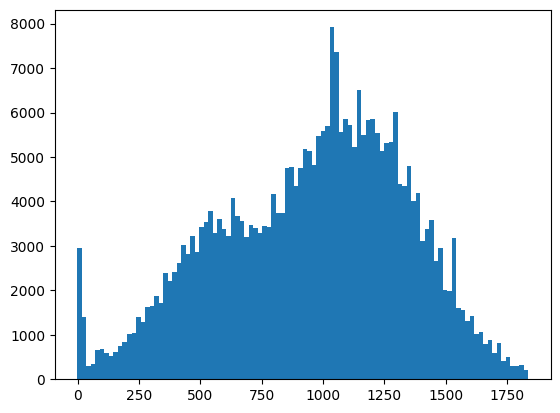

In [11]:
plt.hist(df_num['odometer'],bins=100)

(array([9.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00,
        1.5200e+02, 1.7100e+02, 2.9400e+02, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 4.3000e+01, 8.3000e+01, 1.7020e+03,
        2.7390e+03, 1.3200e+03, 3.6050e+03, 4.3530e+03, 3.5540e+03,
        2.3390e+03, 3.0360e+03, 4.5950e+03, 5.2200e+03, 1.3520e+03,
        8.1400e+02, 1.8310e+03, 3.7230e+03, 4.0000e+03, 2.9750e+03,
        4.7880e+03, 1.3670e+04, 5.1980e+03, 3.3340e+03, 8.8440e+03,
        5.0620e+03, 6.1960e+03, 9.4140e+03, 3.5930e+03, 3.8070e+03,
        3.0770e+03, 4.9530e+03, 3.5380e+03, 7.6310e+03, 1.3369e+04,
        8.2270e+03, 6.3710e+03, 7.9520e+03, 9.4100e+03, 7.5330e+03,
        1.0697e+04, 5.9820e+03, 6.5890e+03, 8.9470e+03, 6.0910e+03,
        8.5430e+03, 8.1500e+03, 1.0773e+04, 9.9770e+03, 4.6620e+03,
        1.5090e+03, 5.1090e+03, 2.2640e+03, 2.0840e+03, 4.1550e+03,
        1.1170e+03, 5.4820e+03, 2.2210e+03, 4.93

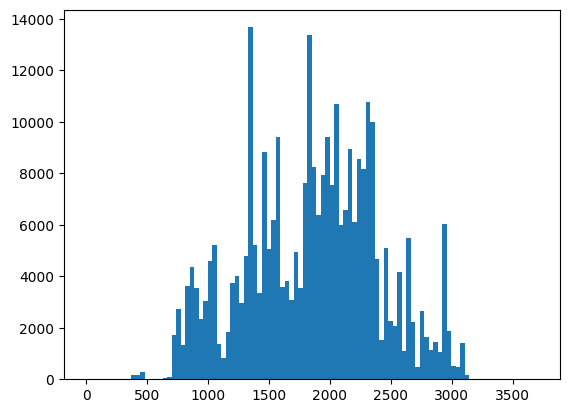

In [12]:
plt.hist(df_num['lat'],bins=100)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        4.9000e+01, 6.5000e+01, 1.4000e+01, 2.9000e+01, 3.7000e+01,
        1.0000e+00, 1.1000e+01, 3.1000e+01, 2.1000e+01, 2.8000e+01,
        2.7000e+01, 7.6000e+01, 4.0000e+01, 5.0000e+01, 2.0000e+01,
        1.2400e+02, 1.1100e+02, 3.6700e+02, 1.4000e+02, 3.9500e+02,
        1.4200e+02, 1.5100e+02, 3.5100e+02, 1.1700e+02, 8.4000e+01,
        1.0900e+02, 1.3100e+02, 1.9100e+02, 3.5300e+02, 1.0600e+02,
        1.2400e+02, 1.4100e+02, 2.5400e+02, 3.2600e+02, 0.0000e+00,
        3.4100e+02, 3.1800e+02, 3.6800e+02, 3.9500e+02, 4.1400e+02,
        4.0700e+02, 4.0100e+02, 0.0000e+00, 5.0200e+02, 6.6000e+02,
        8.5600e+02, 0.0000e+00, 9.0400e+02, 1.2680e+03, 1.4210e+03,
        0.0000e+00, 2.2300e+03, 2.6080e+03, 0.0000e+00, 3.3340e+03,
        4.4180e+03, 0.0000e+00, 5.6590e+03, 7.1970e+03, 0.0000e+00,
        8.3880e+03, 0.0000e+00, 9.9880e+03, 1.1943e+04, 0.0000e+00,
        1.3768e+04, 0.0000e+00, 1.0182e+04, 0.00

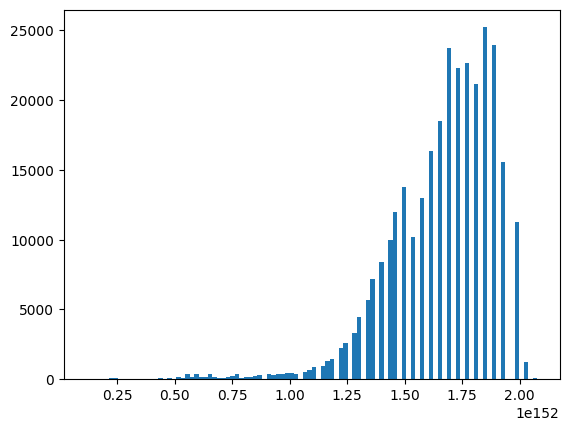

In [13]:
plt.hist(df_num['year'],bins=100)

### แบ่งข้อมูลอักษร

In [14]:
df_ob = df.select_dtypes('object')
df_ob

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,posting_date,matched_make,matched_model
0,auburn,toyota,tundra double cab sr,good,8 cylinders,gas,clean,Automatic (S6),4wd,full-size,pickup,red,al,2021-05-04T10:41:31-0500,toyota,tundra 4wd
1,auburn,ford,f-150 xlt,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500,ford,f-150 lightning platinum 4wd
2,auburn,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,clean,Automatic 6-spd,4wd,full-size,pickup,black,al,2021-05-03T13:41:25-0500,gmc,sierra k15 awd
3,auburn,toyota,tacoma,excellent,6 cylinders,gas,clean,automatic,4wd,compact,truck,grey,al,2021-05-03T12:12:59-0500,toyota,tacoma 4wd
4,auburn,chevrolet,colorado extended cab,good,6 cylinders,gas,clean,Automatic 6-spd,4wd,mid-size,pickup,red,al,2021-05-03T11:31:14-0500,chevrolet,colorado 4wd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,wyoming,nissan,maxima s sedan 4d,good,6 cylinders,gas,clean,Automatic 6-spd,fwd,full-size,sedan,white,wy,2021-04-04T03:21:31-0600,nissan,maxima
346577,wyoming,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,clean,Automatic (variable gear ratios),fwd,mid-size,sedan,red,wy,2021-04-04T03:21:29-0600,volvo,s60
346578,wyoming,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,clean,Automatic (S5),fwd,mid-size,hatchback,white,wy,2021-04-04T03:21:17-0600,cadillac,xt4 fwd
346579,wyoming,lexus,es 350 sedan 4d,good,6 cylinders,gas,clean,Automatic (S9),fwd,mid-size,sedan,silver,wy,2021-04-04T03:21:11-0600,lexus,es 350


In [15]:
df_ob = df_ob.drop(columns={'posting_date','matched_make','matched_model'})

In [16]:
df_ob

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,auburn,toyota,tundra double cab sr,good,8 cylinders,gas,clean,Automatic (S6),4wd,full-size,pickup,red,al
1,auburn,ford,f-150 xlt,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black,al
2,auburn,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,clean,Automatic 6-spd,4wd,full-size,pickup,black,al
3,auburn,toyota,tacoma,excellent,6 cylinders,gas,clean,automatic,4wd,compact,truck,grey,al
4,auburn,chevrolet,colorado extended cab,good,6 cylinders,gas,clean,Automatic 6-spd,4wd,mid-size,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,wyoming,nissan,maxima s sedan 4d,good,6 cylinders,gas,clean,Automatic 6-spd,fwd,full-size,sedan,white,wy
346577,wyoming,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,clean,Automatic (variable gear ratios),fwd,mid-size,sedan,red,wy
346578,wyoming,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,clean,Automatic (S5),fwd,mid-size,hatchback,white,wy
346579,wyoming,lexus,es 350 sedan 4d,good,6 cylinders,gas,clean,Automatic (S9),fwd,mid-size,sedan,silver,wy


In [17]:
df_ob['condition'].value_counts()

condition
excellent    161489
good         122836
like new      16868
fair           4746
new             763
salvage         430
Name: count, dtype: int64

In [18]:
df_ob['cylinders'].value_counts()

cylinders
4 cylinders     115119
6 cylinders     111587
8 cylinders      75293
5 cylinders       2216
10 cylinders      1108
3 cylinders        770
4.0                431
6.0                352
8.0                140
12 cylinders       100
5.0                  8
2.0                  4
3.0                  3
10.0                 1
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()
sc = StandardScaler()
mm = MinMaxScaler()

In [20]:
for i in df_ob.columns:
    df_ob[i] = df_ob[i].astype(str)  # Convert to string to handle NaNs and mixed types
    df_ob[i] = le.fit_transform(df_ob[i])

In [21]:
df_ob

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,16,36,16263,2,12,8,0,15,0,1,36,8,1
1,16,12,6941,0,10,8,0,32,2,1,38,0,1
2,16,13,13815,2,12,8,0,24,0,1,36,0,1
3,16,36,15086,0,10,8,0,32,0,0,38,5,1
4,16,7,4375,2,10,8,0,24,0,2,36,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,396,28,10502,2,10,8,0,24,1,1,37,10,50
346577,396,38,13236,2,6,8,0,19,1,2,37,8,50
346578,396,6,17298,2,6,6,0,14,1,2,33,10,50
346579,396,21,6148,2,10,8,0,18,1,2,37,9,50


In [22]:
prep_df =pd.concat([df_num,df_ob],axis=1)

In [157]:
prep_df

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,197.367281,1.849891e+152,636.055257,1235.538667,-85.480000,16,36,16263,2,12,8,0,15,0,1,36,8,1
1,143.765833,1.686506e+152,1191.872134,1235.711619,-85.518900,16,12,6941,0,10,8,0,32,2,1,38,0,1
2,188.798727,1.647919e+152,844.864851,1235.538667,-85.480000,16,13,13815,2,12,8,0,24,0,1,36,0,1
3,208.113060,1.937294e+152,651.954534,1236.516021,-85.443974,16,36,15086,0,10,8,0,32,0,0,38,5,1
4,194.565773,1.807649e+152,393.745372,1235.538667,-85.480000,16,7,4375,2,10,8,0,24,0,2,36,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,175.225368,1.937294e+152,555.743672,1341.442299,-84.445400,396,28,10502,2,10,8,0,24,1,1,37,10,50
346577,196.252944,1.982498e+152,321.841192,1341.442299,-84.445400,396,38,13236,2,6,8,0,19,1,2,37,8,50
346578,208.087160,1.982498e+152,178.645812,1340.782592,-84.411811,396,6,17298,2,6,6,0,14,1,2,33,10,50
346579,191.710567,1.893099e+152,535.250668,1341.442299,-84.445400,396,21,6148,2,10,8,0,18,1,2,37,9,50


### standard scaler

In [23]:
minmaxscale_data = mm.fit_transform(prep_df)
scaled_data = sc.fit_transform(prep_df)

In [24]:
scaled_df = pd.DataFrame(minmaxscale_data, columns=prep_df.columns)

In [160]:
scaled_df

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,0.779058,0.884724,0.346927,0.334006,0.693786,0.039801,0.947368,0.927195,0.4,0.923077,0.888889,0.0,0.454545,0.0,0.333333,0.900,0.727273,0.02
1,0.567480,0.801435,0.649229,0.334053,0.693407,0.039801,0.315789,0.395724,0.0,0.769231,0.888889,0.0,0.969697,1.0,0.333333,0.950,0.000000,0.02
2,0.745236,0.781765,0.460496,0.334006,0.693786,0.039801,0.342105,0.787628,0.4,0.923077,0.888889,0.0,0.727273,0.0,0.333333,0.900,0.000000,0.02
3,0.821475,0.929280,0.355574,0.334270,0.694138,0.039801,0.947368,0.860091,0.0,0.769231,0.888889,0.0,0.969697,0.0,0.000000,0.950,0.454545,0.02
4,0.768000,0.863191,0.215137,0.334006,0.693786,0.039801,0.184211,0.249430,0.4,0.769231,0.888889,0.0,0.727273,0.0,0.666667,0.900,0.727273,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307127,0.691659,0.929280,0.303246,0.362627,0.703867,0.985075,0.736842,0.598746,0.4,0.769231,0.888889,0.0,0.727273,0.5,0.333333,0.925,0.909091,1.00
307128,0.774660,0.952323,0.176029,0.362627,0.703867,0.985075,1.000000,0.754618,0.4,0.461538,0.888889,0.0,0.575758,0.5,0.666667,0.925,0.727273,1.00
307129,0.821372,0.952323,0.098147,0.362449,0.704194,0.985075,0.157895,0.986203,0.4,0.461538,0.666667,0.0,0.424242,0.5,0.666667,0.825,0.909091,1.00
307130,0.756730,0.906751,0.292100,0.362627,0.703867,0.985075,0.552632,0.350513,0.4,0.769231,0.888889,0.0,0.545455,0.5,0.666667,0.925,0.818182,1.00


In [32]:
scaled_df.shape

(319042, 18)

In [161]:
scaled_df.isnull().sum()

price           0
year            0
odometer        0
lat             0
long            0
region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [25]:
scaled_df = scaled_df.dropna()

In [82]:
scaled_df

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,1.016080,0.812636,-0.767620,-1.033124,0.503458,-1.513033,1.770510,1.474386,0.904880,1.203390,0.278196,-0.183433,-3.680771,-0.981755,-0.233403,0.611462,0.280780,-1.492324
1,0.092542,0.145389,0.612944,-1.032786,0.501329,-1.513033,-0.491309,-0.428924,-0.925796,0.411651,0.278196,-0.183433,0.281254,1.721259,-0.233403,0.765651,-1.722446,-1.492324
2,0.872918,-0.012197,-0.239109,-1.033124,0.503458,-1.513033,-0.397067,0.963789,0.904880,1.203390,0.278196,-0.183433,-1.583228,-0.981755,-0.233403,0.611462,-1.722446,-1.492324
3,1.193543,1.169577,-0.726851,-1.031214,0.505431,-1.513033,1.770510,1.236714,-0.925796,0.411651,0.278196,-0.183433,0.281254,-0.981755,-1.617186,0.765651,-0.470430,-1.492324
4,0.969439,0.640124,-1.403008,-1.033124,0.503458,-1.513033,-0.962522,-0.944944,0.904880,0.411651,0.278196,-0.183433,-1.583228,-0.981755,1.150379,0.611462,0.280780,-1.492324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319037,0.642911,1.169577,-0.975106,-0.830569,0.560097,1.723026,1.016571,0.298038,0.904880,0.411651,0.278196,-0.183433,-1.583228,0.369752,-0.233403,0.688557,0.781586,1.746825
319038,0.997547,1.354183,-1.598069,-0.830569,0.560097,1.723026,1.958995,0.845244,0.904880,-1.171826,0.278196,-0.183433,-2.748530,0.369752,1.150379,0.688557,0.280780,1.746825
319039,1.193118,1.354183,-2.000510,-0.831804,0.561936,1.723026,-1.056764,1.682033,0.904880,-1.171826,-2.020800,-0.183433,-3.913831,0.369752,1.150379,0.380180,0.781586,1.746825
319040,0.921739,0.989091,-1.028495,-0.830569,0.560097,1.723026,0.356873,-0.589889,0.904880,0.411651,0.278196,-0.183433,-2.981590,0.369752,1.150379,0.688557,0.531183,1.746825


In [26]:
scaler_zero_mean = scaled_df - scaled_df.mean()
scaler_zero_mean

,price,year,odometer,lat,long,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,0.230489,0.102916,-0.172971,-0.168125,0.079807,-0.445525,0.493486,0.413536,0.200591,0.236848,0.025602,-0.028088,-0.477513,-0.366596,-0.056641,0.199775,0.102053,-0.456937
1,0.018910,0.019627,0.129332,-0.168078,0.079428,-0.445525,-0.138093,-0.117934,-0.199409,0.083002,0.025602,-0.028088,0.037639,0.633404,-0.056641,0.249775,-0.625220,-0.456937
2,0.196666,-0.000044,-0.059402,-0.168125,0.079807,-0.445525,-0.111778,0.273970,0.200591,0.236848,0.025602,-0.028088,-0.204786,-0.366596,-0.056641,0.199775,-0.625220,-0.456937
3,0.272905,0.147471,-0.164323,-0.167860,0.080158,-0.445525,0.493486,0.346433,-0.199409,0.083002,0.025602,-0.028088,0.037639,-0.366596,-0.389975,0.249775,-0.170675,-0.456937
4,0.219430,0.081382,-0.304760,-0.168125,0.079807,-0.445525,-0.269672,-0.264229,0.200591,0.083002,0.025602,-0.028088,-0.204786,-0.366596,0.276692,0.199775,0.102053,-0.456937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307127,0.143089,0.147471,-0.216651,-0.139504,0.089888,0.499748,0.282959,0.085087,0.200591,0.083002,0.025602,-0.028088,-0.204786,0.133404,-0.056641,0.224775,0.283871,0.523063
307128,0.226090,0.170515,-0.343868,-0.139504,0.089888,0.499748,0.546117,0.240960,0.200591,-0.224690,0.025602,-0.028088,-0.356301,0.133404,0.276692,0.224775,0.102053,0.523063
307129,0.272803,0.170515,-0.421751,-0.139682,0.090215,0.499748,-0.295988,0.472544,0.200591,-0.224690,-0.196620,-0.028088,-0.507816,0.133404,0.276692,0.124775,0.283871,0.523063
307130,0.208160,0.124942,-0.227797,-0.139504,0.089888,0.499748,0.098749,-0.163145,0.200591,0.083002,0.025602,-0.028088,-0.386604,0.133404,0.276692,0.224775,0.192962,0.523063


In [27]:
from sklearn.decomposition import PCA
# ใช้ PCA
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(scaled_df)

# รับชื่อคอลัมน์
feature_names = scaled_df.columns

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

# แสดง loadings สำหรับ PC1 และ PC2
print("Feature Loadings for PC1 and PC2:")
print(loadings[['PC1', 'PC2']])

# ระบุ features ที่มีน้ำหนักมากที่สุดใน PC1 และ PC2
pc1_sorted = loadings['PC1'].abs().sort_values(ascending=False)
pc2_sorted = loadings['PC2'].abs().sort_values(ascending=False)

print("\nFeatures with Largest Weights in PC1:")
print(pc1_sorted.head())

print("\nFeatures with Largest Weights in PC2:")
print(pc2_sorted.head())

Feature Loadings for PC1 and PC2:
                   PC1       PC2
price        -0.077430  0.043406
year         -0.048512  0.016874
odometer     -0.023374 -0.050929
lat          -0.076884 -0.006175
long         -0.005601  0.038993
region        0.033419 -0.006129
manufacturer -0.064073 -0.013348
model        -0.254391 -0.045780
condition     0.032009  0.090956
cylinders    -0.048817 -0.025759
fuel          0.007624 -0.005626
title_status  0.011924  0.005372
transmission -0.003279 -0.026955
drive         0.798755  0.054220
size         -0.053587 -0.003381
type          0.505804 -0.016101
paint_color   0.045131 -0.988331
state        -0.113366  0.040434

Features with Largest Weights in PC1:
drive    0.798755
type     0.505804
model    0.254391
state    0.113366
price    0.077430
Name: PC1, dtype: float64

Features with Largest Weights in PC2:
paint_color    0.988331
condition      0.090956
drive          0.054220
odometer       0.050929
model          0.045780
Name: PC2, dtype: float64

In [28]:
import numpy as np
cov_scaler = np.cov(scaler_zero_mean,rowvar=False)
cov_scaler

array([[ 4.08635760e-02,  1.26563781e-02, -2.16606274e-02,
        -6.29116585e-04, -1.80615224e-03, -9.14938978e-04,
        -3.35374472e-03,  4.26166376e-03,  9.04469284e-03,
         9.16951415e-03, -4.24821790e-03, -2.38827202e-03,
        -7.18542734e-03, -9.69642652e-03, -7.97486623e-04,
        -1.61348789e-03, -2.59817190e-03,  6.04875297e-04],
       [ 1.26563781e-02,  1.52103818e-02, -1.30475560e-02,
        -4.61601383e-04, -1.09106872e-04, -1.89317009e-04,
         4.06369221e-04,  9.37730464e-04,  4.88078486e-03,
        -4.70230778e-03, -1.42189267e-03, -5.50092124e-05,
        -4.07423797e-03, -7.18999875e-03, -1.43331410e-04,
        -2.12584172e-03, -4.75821721e-04,  5.36220127e-04],
       [-2.16606274e-02, -1.30475560e-02,  4.34826931e-02,
         1.24540958e-03,  6.03318778e-04,  5.21762795e-04,
         1.10155403e-03,  6.22356060e-04, -1.80457203e-02,
         4.68841952e-03,  2.43118105e-03, -2.92849322e-04,
         9.34689475e-03, -4.77739491e-03,  8.04474236e

In [29]:
eigenvalue_scaler,eigenvector_scaler =np.linalg.eig(cov_scaler)
eigenvector_scaler

array([[ 7.74298720e-02, -4.34062610e-02,  5.00945261e-02,
         9.53300019e-02,  5.01247468e-01, -2.49109717e-02,
        -5.06464856e-02,  5.11788416e-02,  3.72759779e-02,
         5.09628894e-01,  1.34451871e-01,  3.14707675e-01,
        -1.13683824e-01, -2.04166984e-02, -1.20921756e-02,
        -1.60576110e-01, -5.38041052e-01,  1.28374646e-01],
       [ 4.85124729e-02, -1.68737300e-02,  1.98535928e-02,
         1.62108165e-02,  2.32837442e-01,  2.35329830e-03,
        -9.24444905e-02,  6.22144165e-02,  3.58894996e-04,
         1.35075161e-02,  2.57066328e-01, -7.40230253e-01,
         5.19408752e-01, -5.34778287e-02, -2.21921910e-02,
        -8.33883499e-02, -1.79634205e-01,  5.91864749e-02],
       [ 2.33738473e-02,  5.09293344e-02, -5.07379829e-02,
        -1.27627911e-01, -5.35433859e-01, -7.39127215e-03,
         2.57752365e-01, -1.06632297e-01,  9.30131721e-04,
         1.19131186e-02, -2.91940087e-01, -4.14887646e-02,
         1.28008531e-01, -6.52386671e-03,  9.54048177e

In [30]:
total_variance_scaler = np.sum(eigenvalue_scaler)
total =0
for i,v in enumerate(eigenvalue_scaler):
    print("PVES {} : {} %".format(i,v*100/total_variance_scaler))
    total+=v*100/total_variance_scaler
    print("cumulative PVES {} : {} %".format(i,total))

PVES 0 : 16.047972024383096 %
cumulative PVES 0 : 16.047972024383096 %
PVES 1 : 12.68393701886649 %
cumulative PVES 1 : 28.731909043249587 %
PVES 2 : 9.310620234031964 %
cumulative PVES 2 : 38.04252927728155 %
PVES 3 : 8.606624714553082 %
cumulative PVES 3 : 46.64915399183464 %
PVES 4 : 8.190810376181073 %
cumulative PVES 4 : 54.839964368015714 %
PVES 5 : 7.799856821674244 %
cumulative PVES 5 : 62.63982118968996 %
PVES 6 : 7.32352435594492 %
cumulative PVES 6 : 69.96334554563488 %
PVES 7 : 6.963077036512845 %
cumulative PVES 7 : 76.92642258214772 %
PVES 8 : 5.3970448668917 %
cumulative PVES 8 : 82.32346744903943 %
PVES 9 : 3.703466249732092 %
cumulative PVES 9 : 86.02693369877151 %
PVES 10 : 3.3089314790014597 %
cumulative PVES 10 : 89.33586517777297 %
PVES 11 : 0.7005811498051967 %
cumulative PVES 11 : 90.03644632757818 %
PVES 12 : 0.7351994320517075 %
cumulative PVES 12 : 90.77164575962988 %
PVES 13 : 2.6766276835752003 %
cumulative PVES 13 : 93.44827344320508 %
PVES 14 : 2.197187816

In [31]:
pca = PCA(n_components=8)
X_reduced = pca.fit_transform(scaled_df)

In [32]:
X_reduced

array([[-0.29407274, -0.11560736,  0.13926617, ...,  0.64809246,
         0.03470527,  0.35635619],
       [ 0.67919195,  0.61704984,  0.18797049, ...,  0.53935481,
        -0.33796683,  0.07605357],
       [-0.2485444 ,  0.60130658,  0.13556218, ...,  0.49549108,
        -0.4805529 ,  0.19070102],
       ...,
       [ 0.0317275 , -0.19661126, -0.26608663, ..., -0.68842936,
         0.33139994,  0.31674321],
       [ 0.20357389, -0.11045012, -0.30355623, ..., -0.62215915,
         0.42316219, -0.12584742],
       [ 0.69386371, -0.1387313 , -0.32685811, ..., -0.70628862,
         0.33714899, -0.33885633]])

c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

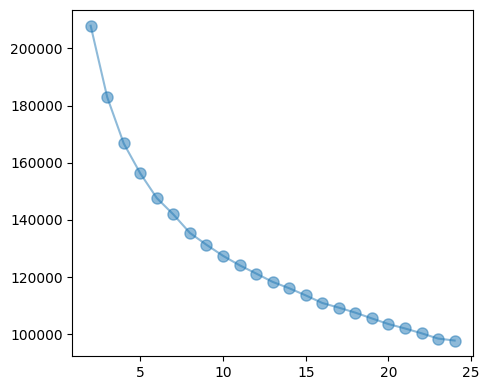

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k).fit(X_reduced)
    sse[k] = kmeans.inertia_
_,ax=plt.subplots(figsize=(5,4))
ax.plot(list(sse.keys()), list(sse.values()), marker='o', alpha=0.5, ms=8);
plt.tight_layout();

## Visualize the clustering 

In [34]:
for k in range(10,15):
    for i in range(10,15):
        kmeans = KMeans(n_clusters=k,n_init=i).fit(scaled_df) 
        print(f'cluster {k} n_init {i}')
        # Get the cluster labels 
        labels = kmeans.predict(scaled_df) # or use kmeans.labels 
        # Get sum of squares distance of all points 
        sse = kmeans.inertia_ 
        # Centroid values 
        centroids = kmeans.cluster_centers_ 
        np.set_printoptions(precision=3) 
        print(f"Sum of squared errors : {sse:.3f}") 
        

cluster 10 n_init 10
Sum of squared errors : 200484.154
cluster 10 n_init 11
Sum of squared errors : 200259.306
cluster 10 n_init 12
Sum of squared errors : 200840.487
cluster 10 n_init 13
Sum of squared errors : 200689.239
cluster 10 n_init 14
Sum of squared errors : 200389.102
cluster 11 n_init 10
Sum of squared errors : 197355.386
cluster 11 n_init 11
Sum of squared errors : 196907.237
cluster 11 n_init 12
Sum of squared errors : 197165.634
cluster 11 n_init 13
Sum of squared errors : 197614.386
cluster 11 n_init 14
Sum of squared errors : 197166.868
cluster 12 n_init 10
Sum of squared errors : 193738.399
cluster 12 n_init 11
Sum of squared errors : 193598.450
cluster 12 n_init 12
Sum of squared errors : 193749.226
cluster 12 n_init 13
Sum of squared errors : 193988.581
cluster 12 n_init 14
Sum of squared errors : 193744.050
cluster 13 n_init 10
Sum of squared errors : 191239.487
cluster 13 n_init 11
Sum of squared errors : 190732.957
cluster 13 n_init 12
Sum of squared errors : 190

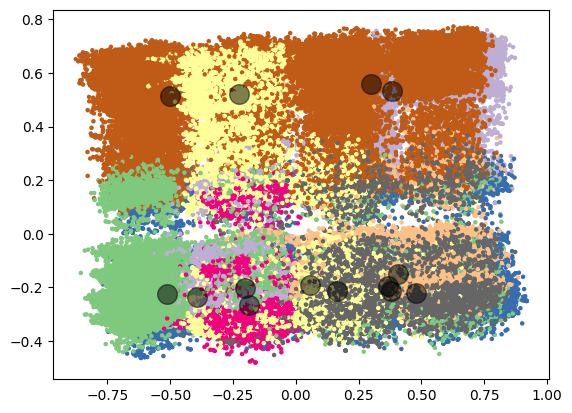

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X_reduced is a NumPy array after PCA reduction
kmeans = KMeans(n_clusters=14,n_init=12).fit(X_reduced)  # Fit the model with 8 clusters
labels = kmeans.predict(X_reduced)  # Predict the cluster labels

# Scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=5, cmap='Accent')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [36]:
new_df =df.copy()

In [39]:
new_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,size,type,paint_color,state,lat,long,posting_date,matched_make,matched_model,cluster
0,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,full-size,pickup,red,al,32.590000,-85.480000,2021-05-04T10:41:31-0500,toyota,tundra 4wd,3
1,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,full-size,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,ford,f-150 lightning platinum 4wd,2
2,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,full-size,pickup,black,al,32.590000,-85.480000,2021-05-03T13:41:25-0500,gmc,sierra k15 awd,6
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,...,compact,truck,grey,al,32.601300,-85.443974,2021-05-03T12:12:59-0500,toyota,tacoma 4wd,13
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,...,mid-size,pickup,red,al,32.590000,-85.480000,2021-05-03T11:31:14-0500,chevrolet,colorado 4wd,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346576,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,...,full-size,sedan,white,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,nissan,maxima,12
346577,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,12029.0,clean,...,mid-size,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,volvo,s60,5
346578,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,4174.0,clean,...,mid-size,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,cadillac,xt4 fwd,4
346579,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,...,mid-size,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,lexus,es 350,12


In [38]:
new_df['cluster'] = labels

In [40]:
new_df.to_csv("feature_engineering_clusteringv3.csv")